### Audio file formats

* .mp3
* .wav
* .m4a
* .flac

* Digital sound is measured in frequency (kHz). 1 KHz = 1000 pieces of information per second
* Streaming songs - 32kHz
* Speech and audio books - 8 to 16 kHz
* Properties of sound - Longitudinal wave; frequency-no.of pulses per second, wavelength and amplitude, speed =340 m/s
* higher amplitude -louder sound (not a linear relationship)
* high pitched (higher frequency) and low pitched (lower frequency)
* human hearing : 20 Hz to 20000Hz
* oscilloscope - device which takes sound and return it as a wave


### Properties of sound wave
* period - distance between two peaks (wavelength)
* frequency - inverse of period
* amplitude - distance of peak from 0 (units of decibel -log func applied to magnitude)
* sound wave : $ y_{t} = A sin(2*pi*f*t+phi) $ phi=phase, f=frequency
* analog wave forms are converted to digital (ADC) - signal sampled from uniform time intervals & amplitude quantised with limited no.of bits. The quality of ADC depends on sample rate and bit depth
* Fourier transform - decompose complex periodic sound into sum of sine waves osciallating at different frequencies. after performing a fast fourier transform on sound waves you get power spectrum (frequency Vs Magnitude) - we move from time domain to frequency domain - no time information > solution is short time fourier transform (STFT) -computes several FFT at  different intervals - it preserves time information , fixed frame size(eg, 2048 samples) , gives a spectrogram (time+frequency+magnitude)
* spectrograms are the input to deep learning
* another important feature : Mel Frequency Cepstral Coefficients (MFCCs) : capture timbral(quality of sound : when piano and violin plays he same note , it has same freq, amplitude etc, but quality of sound is different)/textural aspects of sound, frequency domain feature, approximate human auditory system, 13 to 40 coefficients, calculated at each frame. it is used for speech recognition,music genre classification, music instrument classification

In [13]:
# python's indbuilt module for audio files > wave
import wave,playsound
import librosa as lr
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import Audio

In [2]:
# import audio file as wave objetc
test_audio = wave.open('./data/Actor_01/03-01-01-01-01-01-01.wav','r')

In [9]:
#playing the audio
playsound.playsound('./data/Actor_01/03-01-01-01-01-01-01.wav')

In [3]:
#convert wave object to bytes
test_soundwave = test_audio.readframes(-1)

In [4]:
test_soundwave

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [5]:
# Onset detection task - start of a note

#### Deep learning applicationsin audio
* speech recognition
* voice based emotion classification
* Noise recognition
* Music genre, instrument and mood classification (happy/sad song)
* Music tagging 
* Music generation

In [6]:
data_dir = './data/Actor_01'
audio_files = glob(data_dir+"/*.wav")

In [7]:
len(audio_files)

60

In [8]:
audio,sfreq = lr.load(audio_files[0])

In [9]:
time = np.arange(0,len(audio))/sfreq

In [10]:
time

array([0.00000000e+00, 4.53514739e-05, 9.07029478e-05, ...,
       3.30317460e+00, 3.30321995e+00, 3.30326531e+00])

In [11]:
audio

array([ 1.5591205e-07, -1.5845627e-07,  1.5362870e-07, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

In [14]:
Audio(data=audio,rate=sfreq)

[Text(0.5, 0, 'time in seconds'), Text(0, 0.5, 'sound amplitude')]

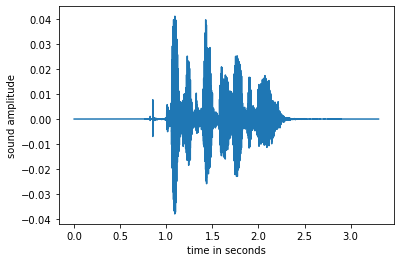

In [15]:
fig,ax = plt.subplots()
ax.plot(time,audio)
ax.set(xlabel='time in seconds',ylabel='sound amplitude')

In [2]:
for i in tqdm(range(1000000)):
    pass

100%|███████████████████████████████████████████████████████████████████| 1000000/1000000 [00:00<00:00, 1026643.31it/s]


In [17]:
#short term fourier transform
lr.stft(audio)

array([[ 1.1208337e-04+0.0000000e+00j,  5.9883092e-05+0.0000000e+00j,
        -4.2027670e-05+0.0000000e+00j, ...,
         1.6626781e-04+0.0000000e+00j,  1.4234603e-04+0.0000000e+00j,
         5.9490326e-06+0.0000000e+00j],
       [-1.1146750e-04-2.0299012e-21j, -5.0040421e-06-4.9850227e-05j,
         1.5443533e-05-5.4172768e-05j, ...,
        -1.4113045e-04+1.0714050e-04j, -8.3680672e-05-1.3199146e-04j,
         1.6063508e-05-1.4445617e-06j],
       [ 1.1040555e-04+2.0778777e-21j, -6.5420601e-05-4.1571607e-06j,
         5.4052340e-05+5.2711708e-05j, ...,
         2.7408847e-05-1.8302067e-04j, -5.7874786e-05+1.8417169e-04j,
         2.2885482e-05-2.6400063e-05j],
       ...,
       [-1.4976489e-06-2.7131524e-21j,  7.5737142e-07-1.2085027e-08j,
         2.0274786e-08-2.8820551e-08j, ...,
        -7.5534308e-09-8.2956667e-08j,  1.6316852e-08+1.0990097e-07j,
        -1.4647664e-08-1.0905356e-08j],
       [ 1.4917696e-06-5.1119762e-22j,  7.7576928e-10-7.3142991e-07j,
         4.3276700e-08

In [18]:
#constant Q transform
lr.cqt(audio)

array([[-1.0053458e-06-1.3582038e-08j, -2.5118661e-07+5.0236207e-07j,
        -7.7287979e-07+3.3558868e-07j, ...,
        -3.8303736e-07-1.4796158e-05j, -1.4354778e-05-2.3273954e-06j,
        -4.9579658e-06+1.3474271e-05j],
       [-2.9357686e-06-1.4196180e-08j, -1.3780466e-06+3.0863980e-06j,
         3.0900298e-06+3.2959699e-06j, ...,
         3.9641986e-06-9.8185683e-06j, -8.1962580e-06-3.7324223e-06j,
        -3.1261402e-06+7.7347167e-06j],
       [ 9.2160853e-06+2.3750576e-07j,  8.6463606e-06-4.8790280e-06j,
         4.7400654e-06-1.0535669e-05j, ...,
        -7.7150080e-06+2.9201631e-06j, -5.7824091e-06+6.2698655e-06j,
        -1.4805399e-06+8.6809832e-06j],
       ...,
       [ 3.0372698e-06+9.1004573e-08j,  0.0000000e+00+0.0000000e+00j,
         2.0150715e-07+3.6221510e-07j, ...,
         3.2332935e-06+2.3031944e-06j,  2.5797697e-09-1.0109831e-08j,
         0.0000000e+00+0.0000000e+00j],
       [ 3.1370269e-06-8.9531945e-08j,  0.0000000e+00+0.0000000e+00j,
        -2.8907053e-07